<a href="https://colab.research.google.com/github/itachi289/assignment1/blob/main/Assignment1_pds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

 ## 1. Design a reproducible workflow with three stages: Data Collection, Data Analysis, and Model Deployment.


 Data Collection Stage:

FolderStructure

 Data_Collection

 /raw_data

 / frailty_data.csv  
    # The raw data file you have (in CSV format)

scripts/

     data_collection.py  
     
    # Script to load and clean the data


  


In [4]:
import pandas as pd
from google.colab import files
import os

# Step 1: Upload the raw data
uploaded = files.upload()

# Load the raw dataset
df = pd.read_csv('StudentsPerformance.csv')  # Update filename if needed

# Step 2: Inspect the data
print("Dataset Overview:")
print(df.head())  # Preview the first few rows

print("\nDataset Information:")
df.info()  # Data types and missing values

print("\nMissing Values:")
print(df.isnull().sum())  # Check for missing values

# Step 3: Data Cleaning
# Remove rows with missing values
df_cleaned = df.dropna()

# Convert columns if needed (e.g., Gender to category)
df['Gender'] = df['Gender'].astype('category')

# Step 4: Feature Engineering (optional)
df_cleaned['AverageScore'] = df_cleaned[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)

# Save the cleaned data
df_cleaned.to_csv('Data_Collection/cleaned_StudentsPerformance.csv', index=False)

# Verify the file has been saved
print("\nSaved Cleaned Data to 'Data_Collection/cleaned_StudentsPerformance.csv'")
os.listdir('Data_Collection')  # List files in the 'Data_Collection' folder


FileNotFoundError: [Errno 2] No such file or directory: 'StudentsPerformance.csv'

b.**Data Analysis Stage:**

Folder Structure:

 Data_Analysis/
 scripts/data_analysis.py

 visualizations/
     
     plot1.png
    # Example plot showing the correlation between age and grip strength.

     plot2.png
    # Another plot showing frailty vs grip strength, etc.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

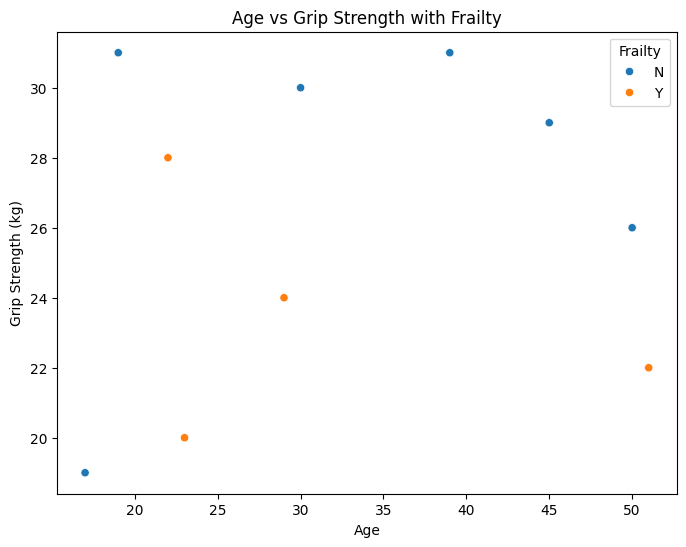

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
df = pd.read_csv('frailty_data.csv')

# Visualization: Scatter plot for Age vs Grip Strength
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Grip Strength (kg)', hue='Frailty', data=df)
plt.title('Age vs Grip Strength with Frailty')
plt.show()

# Perform additional analysis or visualizations here...


C. **Model Deployment Stage:**

 Folder Structure

Model_Deployment/

model/

frailty_predictor.pkl    
    # Trained model for predicting frailty

scripts/

 deploy_model.py
    # Script for loading and using the trained model

  README.md  
    # A README file explaining how to deploy and use the model


 Model Deployment stage for Frailty Prediction

This stage involves predicting frailty based on physical attributes like grip strength, age, weight, and height.

## Files:
- `train_model.py`: Script to train the Random Forest model and save it as `frailty_predictor.pkl`.
- `deploy_model.py`: Script to load the trained model and make predictions based on new data.
- `model/`: Folder that contains the saved model (`frailty_predictor.pkl`).

## How to use:

* **Train the model**:
   Run the `train_model.py` script to train the model and save it as `frailty_predictor.pkl`.

* **Make predictions**:
   Run the `deploy_model.py` script with sample input data to predict frailty status.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib  # To save the trained model

# Load the integrated dataset (make sure you have the right path)
df = pd.read_csv('/content/frailty_data.csv')

# Define features (X) and target (y)
# You can modify this to fit the features you have
X = df[['Age', 'Grip Strength (kg)', 'Height', 'Weight']]  # Example features
y = df['Frailty']  # Target variable (Frailty: 'Y' or 'N')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file using joblib
joblib.dump(model, 'model/frailty_predictor.pkl')

# Print a message to confirm the model has been saved
print("Model has been saved as 'frailty_predictor.pkl'")


Model has been saved as 'frailty_predictor.pkl'


In [ ]:
import joblib  # To load the trained model
import pandas as pd

# Load the trained model from the 'model' directory
model = joblib.load('model/frailty_predictor.pkl')

#deploy_model
new_data = pd.DataFrame({
    "Age": [30],
    "Grip Strength (kg)": [25],
    "Height": [68],
    "Weight": [135]
})

# Use the model to make a prediction on the new data
prediction = model.predict(new_data)

# Output the prediction
print(f"Predicted Frailty Status: {prediction[0]}")  # 'Y' or 'N' (frailty status)


Predicted Frailty Status: Y


 ## 2. Develope five data visualizations on the student performance dataset.

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


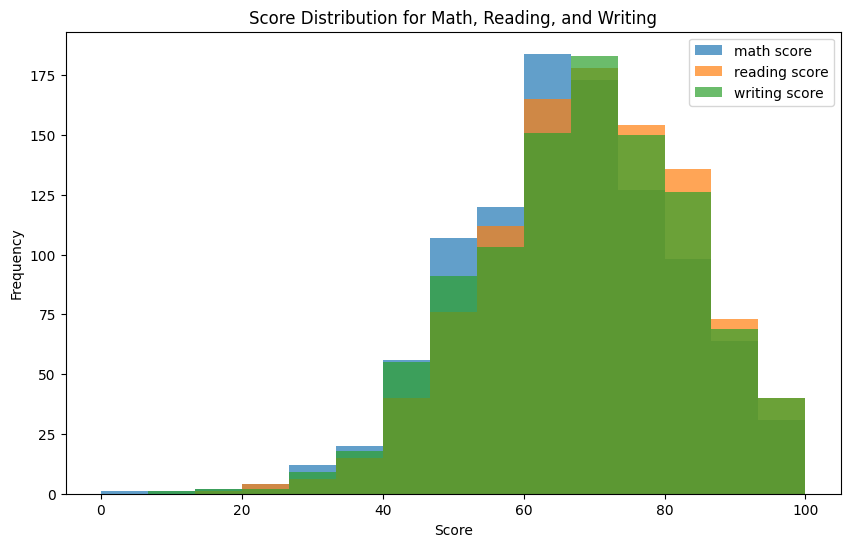

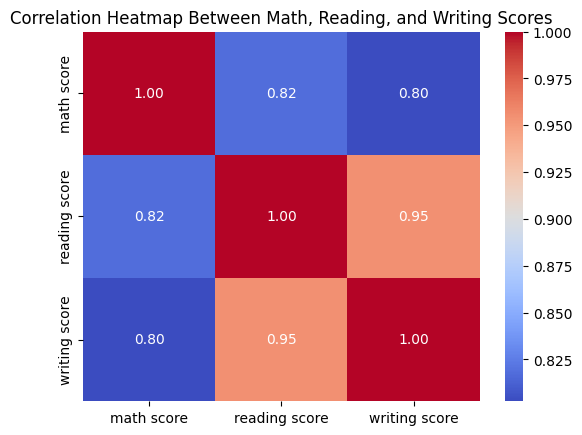

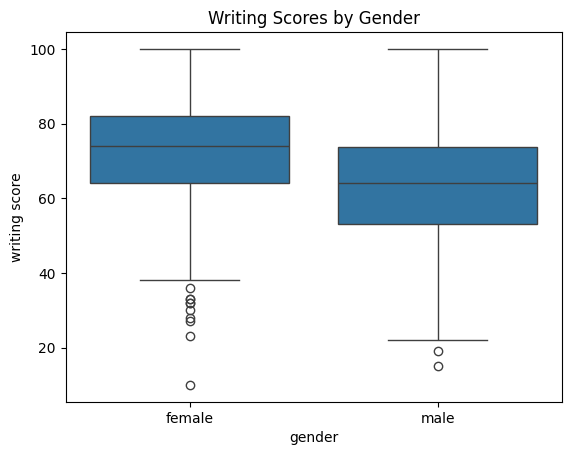

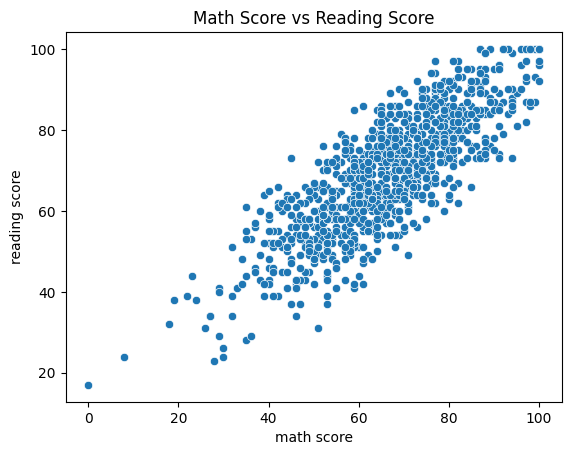

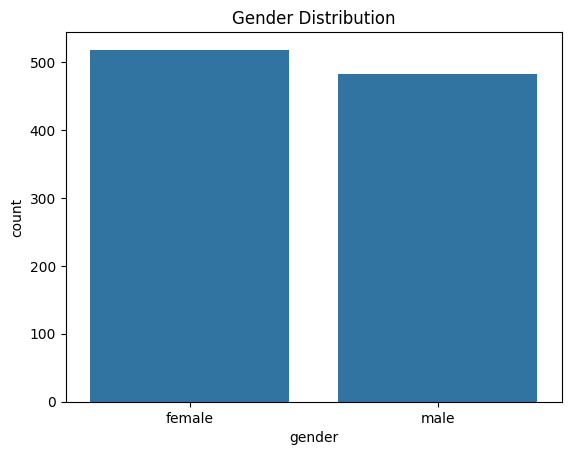

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

# Create the visualizations folder if it doesn't exist
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Check the column names to ensure they are correct
print(df.columns)

# 1. Distribution of Scores for Each Subject (Histogram)
df[['math score', 'reading score', 'writing score']].plot(kind='hist', bins=15, alpha=0.7, figsize=(10, 6))
plt.title('Score Distribution for Math, Reading, and Writing')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('visualizations/score_distribution.png')
plt.show()

# 2. Correlation Heatmap Between Math, Reading, and Writing Scores
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between Math, Reading, and Writing Scores')
plt.savefig('visualizations/correlation_heatmap.png')
plt.show()

# 3. Box Plot for Writing Scores by Gender
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Scores by Gender')
plt.savefig('visualizations/writing score gender.png')
plt.show()

# 4. Scatter Plot Between Math and Reading Scores
sns.scatterplot(x='math score', y='reading score', data=df)
plt.title('Math Score vs Reading Score')
plt.savefig('visualizations/math_vs_reading.png')
plt.show()

# 5. Gender Distribution Bar Plot
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.savefig('visualizations/gender_distribution.png')
plt.show()


#Analysis for Each Visualization

* First Visualization: Distribution of Scores for Each Subject

Analysis: By creating a histogram for the scores in Math, Reading, and Writing, we can easily compare how the scores are distributed across each subject. This helps in identifying if any subjects have skewed distributions or outliers, which could indicate underlying patterns or areas for improvement in the students' performance.

* Second Visualization: Correlation Heatmap

Analysis: The heatmap showing the correlation between Math, Reading, and Writing scores makes it easy to see which subjects are most closely related to each other. This can help in identifying if students who perform well in one subject are likely to perform well in others, suggesting possible interdependencies.

* Third Visualization: Box Plot of Writing Scores by Gender

Analysis: This visualization helps to easily compare the distribution of writing scores between Male and Female students. It can reveal if there are any significant differences in the central tendency or variability of scores across gender.
      
 * Fourth Visualization: Scatter Plot Between Math and Reading Scores

Analysis: The scatter plot shows the relationship between Math and Reading scores. By visualizing this, we can observe any trends, clusters, or outliers that may indicate a relationship between performance in the two subjects.

* Fifth Visualization: Gender Distribution Bar Plot

Analysis: This bar plot shows the gender distribution of the students. It helps us understand the balance between male and female students in the dataset, which could be relevant when looking at differences between genders in performance.

## Folder Structure
**For 5 data visualization tasks on the student performance dataset**

Student_Performance_Analysis/

 data/

  StudentsPerformance.csv  
    # Raw data file (the student performance dataset)
  
 scripts/
     data_visualization.py   
    # Python script that generates all the visualizations

 visualizations/
 score_distribution.png   
    # Visualization for score distribution

 correlation_heatmap.png  
    # Correlation heatmap between subjects

  writing_score_gender.png
    # Box plot for writing scores by gender
  math_vs_reading.png     
    # Scatter plot between Math and Reading scores
  gender_distribution.png
    # Gender distribution bar plot
 README.md                  
    # README with explanations of each visualization and how analysis became easier


This readme.md explores the student performance dataset and visualizes various aspects to gain insights into student performance across subjects. This file should explain what each visualization is showing and how it simplifies or enhances the analysis.

## Visualizations:

1. **Distribution of Scores for Each Subject**:
   - **Visualization**: A histogram for the Math, Reading, and Writing scores.
   - **Analysis**: This visualization helped in identifying the distribution of scores across subjects, making it easier to spot skewness or outliers in the data.

2. **Correlation Heatmap Between Subjects**:
   - **Visualization**: A heatmap showing the correlation between Math, Reading, and Writing scores.
   - **Analysis**: The heatmap made it easy to identify which subjects are most correlated, helping to understand relationships between student performance in different subjects.

3. **Writing Scores by Gender**:
   - **Visualization**: A box plot showing the distribution of Writing scores by gender.
   - **Analysis**: This helped in comparing the distribution of Writing scores between male and female students, making it easier to see if any gender-based differences exist in writing performance.

4. **Scatter Plot Between Math and Reading Scores**:
   - **Visualization**: A scatter plot showing the relationship between Math and Reading scores.
   - **Analysis**: This plot made it easier to visualize the relationship between students' performance in Math and Reading and identify any trends or outliers.

5. **Gender Distribution**:
   - **Visualization**: A bar plot showing the distribution of male and female students.
   - **Analysis**: This helped understand the balance between genders in the dataset, providing context for analyzing gender differences in performance.






